<a href="https://colab.research.google.com/github/guilhermeguy/data_analysis/blob/master/911_calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Kaggle dataset analysis

**Emergency - 911 Calls**

File -> *911.csv*

In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [0]:
df = pd.read_csv('911.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [68]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### 5 most frequent zip codes

In [69]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### 5 most frequent townships

In [70]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### Number of exclusive entries in the title column

In [71]:
df['title'].nunique()

110

#### Creating new column 'Reason' with first part of strings under 'title'

In [72]:
df['title'].iloc[0].split(':')[0]

'EMS'

In [0]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])


In [74]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

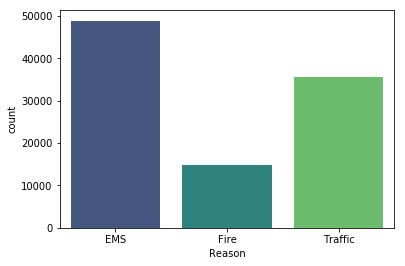

In [75]:
sns.countplot(x='Reason', data=df, palette='viridis')

In [76]:
type(df['timeStamp'])

pandas.core.series.Series

In [0]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

### Identifying days of the week, Month and time

In [0]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5:'Sat', 6: 'Sun'}

In [0]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)


In [0]:
df['Day of Week'] = df['Day of Week'].map(dmap)

#### Number or entries by day of the week separated by reason

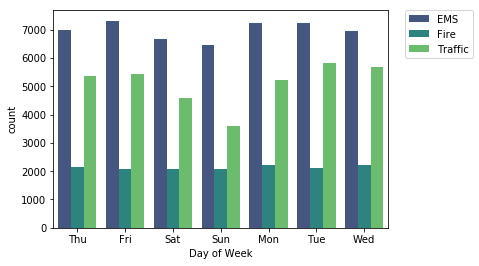

In [81]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

####Number of entries by month separated by reason

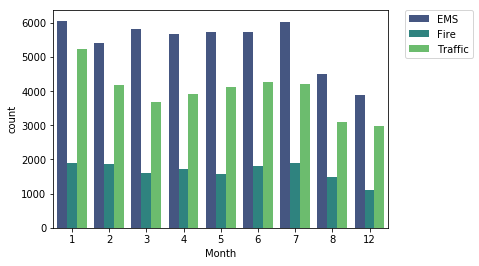

In [82]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

In [0]:
byMonth = df.groupby('Month').count()

byMonth.reset_index(inplace=True)


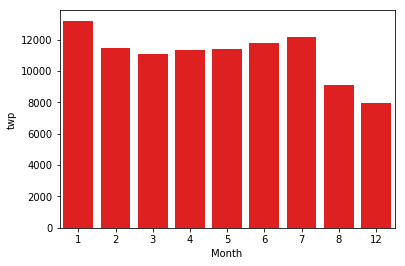

In [84]:
sns.barplot(x='Month', y='twp', data=byMonth, color='red')

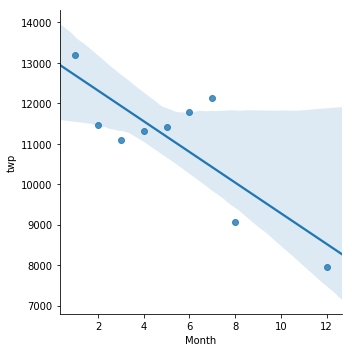

In [85]:
sns.lmplot(x='Month', y='twp', data=byMonth)

#### Creating a date column

In [0]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())


In [0]:
byDate = df.groupby('Date').count()

In [0]:
byDate = byDate.reset_index()

####Frequency of occurreces by date

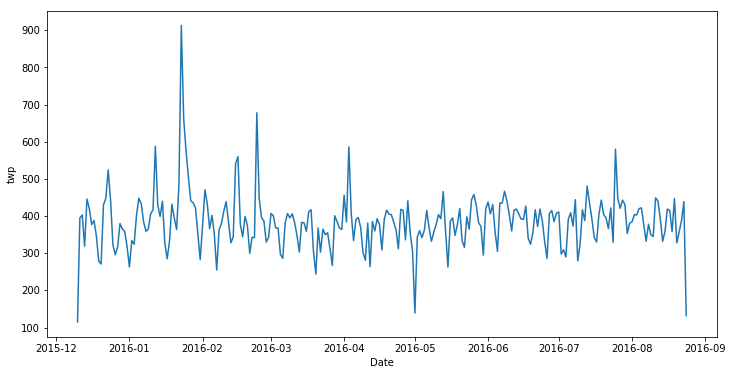

In [89]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='twp', data=byDate)

#### Frequency of occurrences by date and Reason

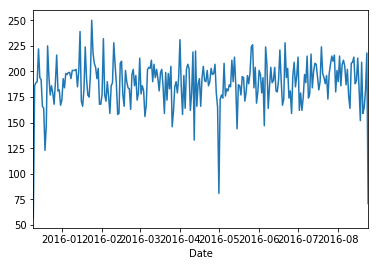

In [90]:
dfEMS = df[df['Reason'] == 'EMS']
dfEMS.groupby('Date').count()['twp'].plot()

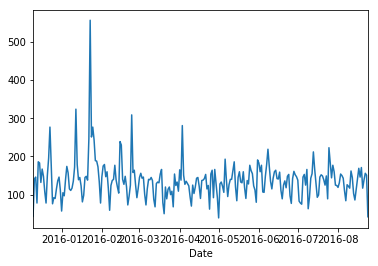

In [91]:
dfTraffic = df[df['Reason'] == 'Traffic']
dfTraffic.groupby('Date').count()['twp'].plot()

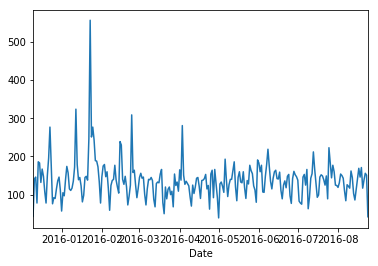

In [92]:
dfFire = df[df['Reason'] == 'Traffic']
dfTraffic.groupby('Date').count()['twp'].plot()

### Heatmaps

### #Ocurrences by time and day of the week

In [93]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['twp'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,793,822,893,842,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,697,769,801,830,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,643,693,770,679,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,887,936,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,840,837,887,917,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,800,789,902,872,903,867,989,1036,894,686,668,574,490,334


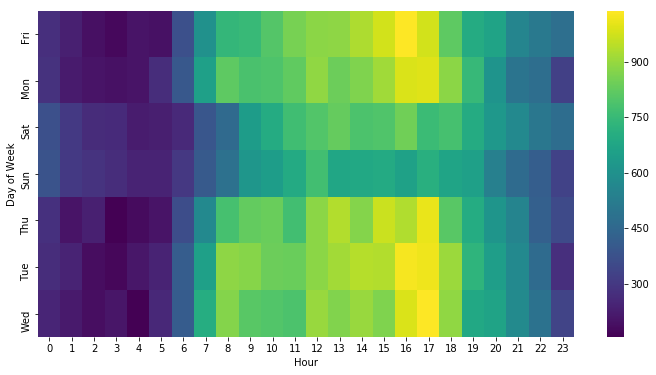

In [94]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour, cmap='viridis')

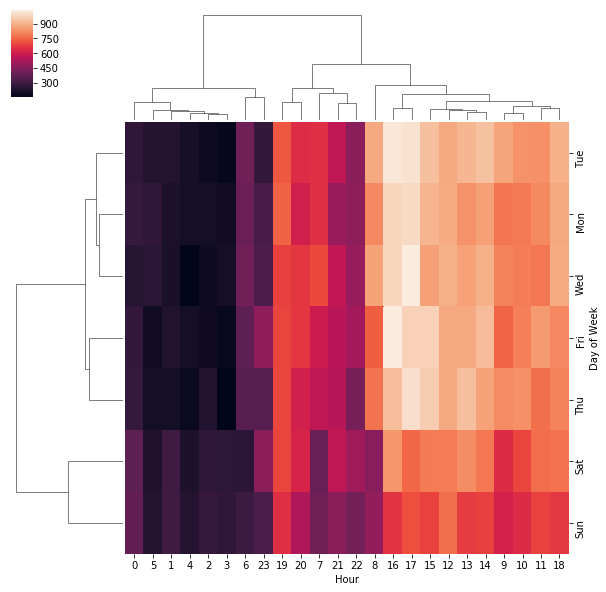

In [95]:
sns.clustermap(data=dayHour)

In [100]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['twp'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


####Occurrences by month and day of the week

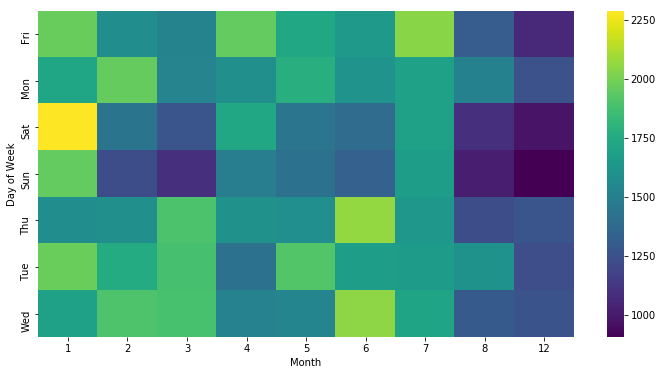

In [101]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

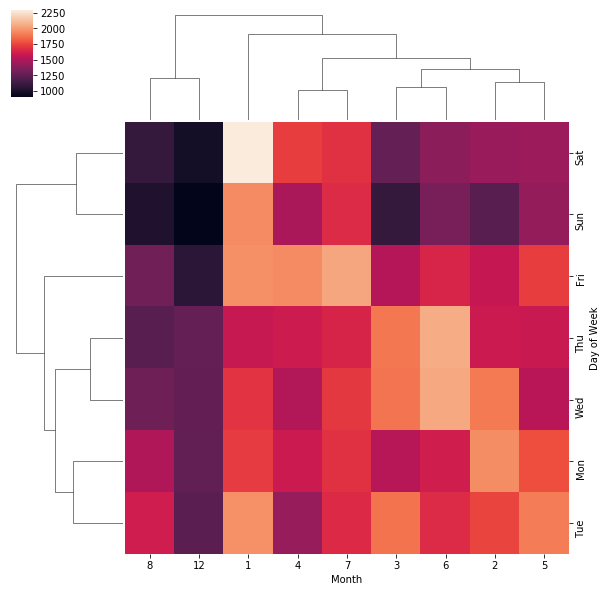

In [102]:
sns.clustermap(dayMonth)